# meaningful quartile values from discrete data

attempt at figuring out a meaningful value for quartiles of data when that data consists of whole numbers better suited for buckets in a histogram than a smooth, continuous distribution.

0.25 quartile value: 4.57465066829
0.5 quartile value: 5.89215686275
0.75 quartile value: 7.23546561482


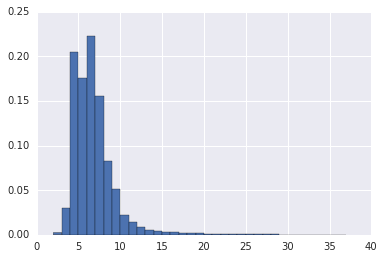

In [61]:
# histogram stuff!

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
df = pd.read_csv('data.csv', header=None)

# convert to list
data = list(df[0])

# find max/min values
d_min = min(data)

d_max = max(data)

# generate normalized histogram of relative frequencies
y, x = np.histogram(data, bins=(d_max-d_min), normed=True)


# iterate through bin values to determine which bucket contains the particular threshold
hist_quartiles = {}
for lim in [0.25, 0.5, 0.75]:
    
    r = 0
    idx = 0
    while r + y[idx] < lim:
        r += y[idx]
        idx += 1
    threshold_bucket_value = y[idx]
    val = x[idx] - 0.5 # subtract half a bin 

    # compute relative percentage of that bucket before which the quartile piece occurs
    diff = lim - r
    diff_pct = diff/threshold_bucket_value
    
    # compute quartile value
    q_val = diff_pct + val
    
    # add to our histogram summary data
    hist_quartiles[str(lim)] = q_val

    # output bucket value plus its quartile percentage sliver
    print '{0} quartile value: {1}'.format(lim, q_val)

# plot stuff
plt.hist(data, normed=True, bins=(d_max-d_min))
plt.show()

# actually fitting the data

Getting a nice fit using `scipy.stats`.

0.25 quartile value: 4.6046046046
0.5 quartile value: 5.88588588589
0.75 quartile value: 7.20720720721


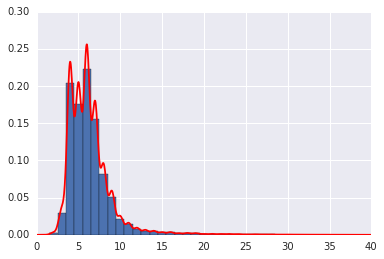

In [62]:
import scipy

# generate fit function
z = scipy.stats.gaussian_kde(data)

# get a bunch of x data
x = np.linspace(0,40,1000)
# fit y coordinates to x data
y = z(x)

# plot curve and histogram to show hope dope the pairing is
plt.plot(x,y,c='r')
plt.hist([j - 0.5 for j in data], normed=True, bins=(d_max-d_min))

# normalize y so sum = 1
y_norm = [i/sum(y) for i in y]

# compute quartiles
fit_quartiles = {}
for lim in [0.25, 0.5, 0.75]:
    r = 0
    idx = 0
    while r + y_norm[idx] < lim:
        r += y_norm[idx]
        idx += 1
    val = x[idx]
    
    # add to our fit summary data
    fit_quartiles[str(lim)] = val
    
    # output quartile value
    print '{0} quartile value: {1}'.format(lim, val)

# conclusion

actually, all quartile numbers are *extremely* close to each other!

In [68]:
for q in [0.25, 0.5, 0.75]:
    h = round(hist_quartiles[str(q)],3)
    f = round(fit_quartiles[str(q)],3)
    print h, '/', f, '=', round(h/f,3)

4.575 / 4.605 = 0.993
5.892 / 5.886 = 1.001
7.235 / 7.207 = 1.004
